In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

adv = pd.read_csv('advertising.csv')
X, y = np.array(adv.iloc[:, :3]), np.array(adv.iloc[:, 3:])

## 3.1
Po zrobieniu wykresów zależności y od każdego z x'ów, widać że preprocessing z poprzedniego zadania nie zadziała w tym przypadku. Dane dla których co najmniej jedna wartość spełnia zależność >3 $\sigma$ (czerwone kropki) nie są outlierami.

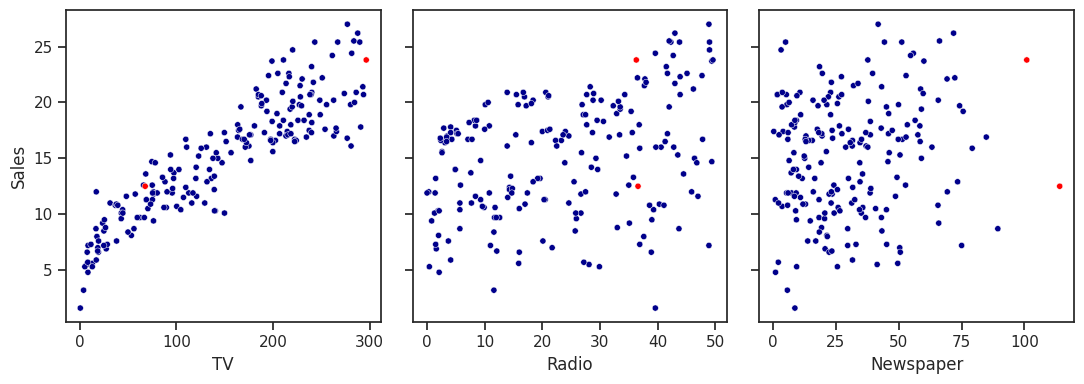

In [2]:
def scale(x):
    return (x - x.mean(0)) / x.std(0)

outlier_idx = (scale(X) > 3).any(1) | (scale(y) > 3).any(1)
colors = ['darkblue'] * len(outlier_idx)
for i in np.nonzero(outlier_idx)[0]: colors[i] = 'red'

fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharey=True)

for i, col in enumerate(adv.columns[:-1]):
    sns.scatterplot(adv, x=col, y='Sales', s=20, color=colors, ax=axes[i])
    
fig.tight_layout()

## 3.2 i 3.3
Obydwa modele uzyskują podobne wartości $R^2$, a ich różnica (~0.0004) jest minimalna i może się mieścić w ramach niedokładności numerycznych. Wniosek - przekształcenia liniowe danych wejściowych nie mają wpływu na dopasowanie regresji.

In [20]:
def preprocess_data(X, y): return scale(X), scale(y)

def test_model(model, X, y, prep_fn=lambda X, y: (X, y)):    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    score = 0.0
    
    for train_idx, test_idx in kfold.split(X):
        X_train, y_train = prep_fn(X[train_idx], y[train_idx])
        X_test, y_test = prep_fn(X[test_idx], y[test_idx])
        
        lm = model.fit(X_train, y_train)
        score += lm.score(X_test, y_test)
        
    return score / 5

score = test_model(LinearRegression(), X, y)
print(f"R^2 of unnormalized data: {score:.4f}")

score = test_model(LinearRegression(), X, y, preprocess_data)
print(f"R^2 of normalized data: {score:.4f}")

R^2 of unnormalized data: 0.8948
R^2 of normalized data: 0.8952
